# Crimes in Montgomery County

This project aims to explore of crimes in Montgomery Count, Maryland.

The data used is downloaded and saved in the "Crime.csv" file of this repository, but can also be accessed on the Montgomery County open data website: (https://data.montgomerycountymd.gov/). Each row in the data is a crime reported by a law enforcement officer and contains the following information:

1. **Incident ID**: Police Incident Number
2. **Offence Code**: Offense_Code is the code for an offense committed within the incident as defined by the National Incident-Based Reporting System (NIBRS) of the Criminal Justice Information Services (CJIS) Division Uniform Crime Reporting (UCR) Program.
3. **CR Number**: Police Report Number
4. **Dispatch Date / Time**: The actual date and time an Officer was dispatched
5. **NIBRS Code**: FBI NBIRS codes
6. **Victims**: Number of Victims
7. **Crime Name1**: Crime against Society/Person/property or Other
8. **Crime Name2**: Describes the NBIRS_CODE
9. **Crime Name3**: Describes the OFFENSE_CODE
10. **Police District Name**: Name of District (Rockville, Wheaton etc.)
11. **Block Address**: Address in 100 block level
12. **City**: City
13. **State**: State
14. **Zip Code**: Zip code
15. **Agency**: Assigned Police Department
16. **Place**: Place description
17. **Sector**: Police Sector Name, a subset of District
18. **Beat**: Police patrol area subset within District
19. **PRA**: Police patrol area, a subset of Sector
20. **Address Number** House or Bussines Number
21. **Street Prefix** North, South, East, West
22. **Street Name** Street Name
23. **Street Suffix** Quadrant(NW, SW, etc)
24. **Street Type** Avenue, Drive, Road, etc
25. **Start_Date_Time**: Occurred from date/time
26. **End_Date_Time**: Occurred to date/time
27. **Latitude**: Latitude
28. **Longitude**: Longitude
29. **Police District Number**: Major Police Boundary
30. **Location**: Location


Let me first import libraries and package that I will be using

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style="white")

# Step-I: Data Cleaning
First thing we do is read the file using _read_csv()_ function, next we will check on the size of the data, the existence of null entries, along with birds eye view of information about the data. We do this using _shape()_,_isnull()_, _info()_ functions respectively as is done in the following cells. We learned that the dataset has 202094 rows and 30 columns. The names of the columns can be accessed using the _columns()_ function. The description of the names of the columns is given in the introduction part.

In [60]:
mg_crimes = pd.read_csv("Crime.csv")
mg_crimes.head()

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201223224,2303,190002520,01/16/2019 03:51:46 PM,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,...,NaN,VEIRS MILL,NaN,RD,01/16/2019 03:51:00 PM,NaN,39.037367,-77.051662,4D,"(39.0374, -77.0517)"
1,201224613,2006,190004310,01/27/2019 06:05:56 PM,200,1,Crime Against Property,Arson,ARSON - RESIDENTIAL,MONTGOMERY VILLAGE,...,NaN,GIRARD,NaN,ST,01/27/2019 06:05:00 PM,NaN,39.146531,-77.184940,6D,"(39.1465, -77.1849)"
2,201267200,1103,190057412,11/28/2019 06:08:02 AM,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,GEORGIA,NaN,AVE,11/28/2019 06:08:00 AM,NaN,39.034255,-77.049163,4D,"(39.0343, -77.0492)"
3,201257255,2308,190044694,09/18/2019 10:43:59 AM,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,ROCKVILLE,...,NaN,JONES,NaN,LA,04/01/2019 10:43:00 AM,04/06/2019 11:59:00 PM,39.104041,-77.264460,1D,"(39.104, -77.2645)"
4,201230900,1399,190011960,03/15/2019 10:53:22 AM,13B,2,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,BLV,03/15/2019 10:50:00 AM,03/15/2019 10:55:00 AM,39.141812,-77.224489,6D,"(39.1418, -77.2245)"


In [61]:
# checking size of the dataset
mg_crimes.shape

(202094, 30)

In [62]:
# checking columns
mg_crimes.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [63]:
# Preliminary infromation about the dataset
mg_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202094 entries, 0 to 202093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             202094 non-null  int64  
 1   Offence Code            202094 non-null  object 
 2   CR Number               202094 non-null  int64  
 3   Dispatch Date / Time    147061 non-null  object 
 4   NIBRS Code              202094 non-null  object 
 5   Victims                 202094 non-null  int64  
 6   Crime Name1             202023 non-null  object 
 7   Crime Name2             202023 non-null  object 
 8   Crime Name3             202023 non-null  object 
 9   Police District Name    202094 non-null  object 
 10  Block Address           183171 non-null  object 
 11  City                    201183 non-null  object 
 12  State                   202094 non-null  object 
 13  Zip Code                198908 non-null  float64
 14  Agency              

We note here that there are some missing entries on the data, to get the exact number of missing information let us call the _isnull()_ function.

In [64]:
# missing data for each column
mg_crimes.isnull().sum()

Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       55033
NIBRS Code                     0
Victims                        0
Crime Name1                   71
Crime Name2                   71
Crime Name3                   71
Police District Name           0
Block Address              18923
City                         911
State                          0
Zip Code                    3186
Agency                         0
Place                          0
Sector                        49
Beat                          49
PRA                           31
Address Number             18860
Street Prefix             193147
Street Name                    0
Street Suffix             198205
Street Type                  303
Start_Date_Time                0
End_Date_Time             104774
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

In [65]:
print(f"Ratio of missing entries for column named 'Dispatch Date / Time': {mg_crimes['Dispatch Date / Time'].isnull().sum()/len(mg_crimes)}")
print(f"Ratio of missing entries for column named 'End_Date_Time': {mg_crimes['End_Date_Time'].isnull().sum()/len(mg_crimes)}")

Ratio of missing entries for column named 'Dispatch Date / Time': 0.27231387374192206
Ratio of missing entries for column named 'End_Date_Time': 0.5184419131691194


How to replace the missing values is the question for analysis, I have to options: one replacing the missing data by average and two dropping the missing information.

# Step-II: Analyzing Crime Patterns
## a) When do crimes happen?

One of the first questions I would like to raise is when do crimes most likely occur?, is there a difference in number of crimes between days of the week?, time of the day?, and month of the year? To answer this questions it is necessary to convert the time format into datetime format using the pandas _to_datetime()_ function.This parsing will help us extract the day, date, and time from the columns _Dispatch Date/ Time_, _End_Date_Time_, and _Start_Date_Time_.  
As part of taking care of the missing data obtained above, we can also make a comparison of information from these there columns and see if there is a gap in results obtained.

### Crime day (dispatch time)
To identify the day of the week with highest frequency of crimes, let us extract the day of the week from the "Dispatch Date / Time" column. To achive this, we will use the _day_name()_ function. 

Friday       22723
Tuesday      22631
Wednesday    22553
Thursday     22145
Monday       21411
Saturday     18742
Sunday       16856
Name: Dispatch Date / Time, dtype: int64


<Figure size 864x720 with 0 Axes>

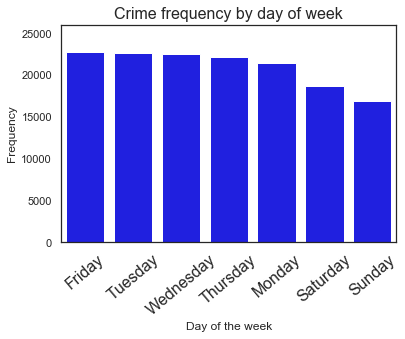

<Figure size 864x720 with 0 Axes>

In [66]:
# Using dispatch time identify days of week
dispatch_time = pd.to_datetime(mg_crimes["Dispatch Date / Time"])
dispatch_week = dispatch_time.dt.day_name()
print(dispatch_week.value_counts())
ax = sns.barplot(x=dispatch_week.value_counts().index,y=dispatch_week.value_counts(),color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylim=(0, 26000),xlabel='Day of the week',ylabel='Frequency')
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')
plt.title("Crime frequency by day of week",fontsize= 16)
plt.xticks(fontsize=16)
plt.figure(figsize=(12,10))

In [67]:
((22723-16856)/((22723+16856)*0.5))*100

29.64703504383638

We see that crimes are high during weekdays. Saturday, Sunday, Monday sees less crime and then crimes starts to climb up on Tuesday. The highest crime day is on Friday the lowest being on Sunday,the percentage difference between the highest and the lowest is about 30%.

Is it because weekends most people are staying at home, going to church, visit families?

### Crime time (dispatch time)
What time of the day do crimes frequently occur?

15.0    9718
16.0    9494
17.0    8728
13.0    8262
19.0    8117
12.0    8040
18.0    8018
21.0    7729
20.0    7625
11.0    7358
10.0    7350
14.0    7269
22.0    7255
23.0    6654
9.0     6449
8.0     5022
0.0     4932
1.0     4208
7.0     3755
2.0     3730
3.0     2588
6.0     1973
4.0     1533
5.0     1254
Name: Dispatch Date / Time, dtype: int64


<Figure size 864x720 with 0 Axes>

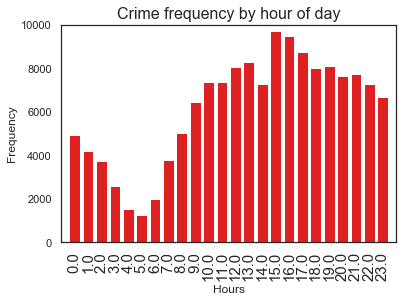

<Figure size 864x720 with 0 Axes>

In [68]:
# Using dispatch time identify time of the day
dispatch_hour = dispatch_time.dt.hour
print(dispatch_hour.value_counts())
ax = sns.barplot(x=dispatch_hour.value_counts().index,y=dispatch_hour.value_counts(), color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 10000))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')
plt.title("Crime frequency by hour of day",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

We see that the crimes are low early in the morning and peaks up around 3pm with a little dip around 2pm (why?) and continues to steadily decrease towards midlnight.
Is it because the late afternoon (3-4pm) is high trafiic time, when people are out in the street?

### Crime month (dispatch time)

5.0     13907
8.0     13550
7.0     13452
6.0     13344
4.0     13341
10.0    12677
9.0     12254
1.0     12172
12.0    12130
11.0    12031
3.0      9469
2.0      8734
Name: Dispatch Date / Time, dtype: int64


<Figure size 864x720 with 0 Axes>

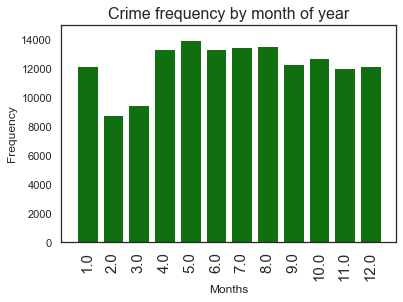

<Figure size 864x720 with 0 Axes>

In [69]:
# Using dispatch time identify month of the year
dispatch_month = dispatch_time.dt.month
print(dispatch_month.value_counts())
ax = sns.barplot(x=dispatch_month.value_counts().index,y=dispatch_month.value_counts(), color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 15000))
ax.set(xlim=(-1, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')
plt.title("Crime frequency by month of year",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

With exception of February and March the crimes seem to occur almost uniformly in each month. 
Is it because these months come after holidays, or weather is cold during these months?

### Crime day (End time)

Friday       14998
Monday       14520
Wednesday    14517
Thursday     14247
Tuesday      14160
Saturday     13093
Sunday       11785
Name: End_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

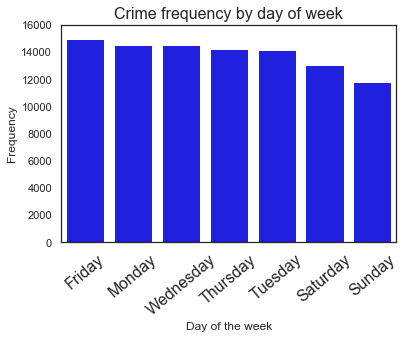

<Figure size 864x720 with 0 Axes>

In [70]:
# Using end time identify days of week
end_time = pd.to_datetime(mg_crimes["End_Date_Time"])
end_week = end_time.dt.day_name()
print(end_week.value_counts())
ax = sns.barplot(x=end_week.value_counts().index,y=end_week.value_counts(),color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylim=(0, 16000),xlabel='Day of the week',ylabel='Frequency')
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')
plt.title("Crime frequency by day of week",fontsize= 16)
plt.xticks(fontsize=16)
plt.figure(figsize=(12,10))

We still see that occurence of crimes during weekends is lower than the weekdays, and Friday is highest crime day. 

### Crime time (End time)

0.0     8013
12.0    5498
8.0     5275
9.0     4924
7.0     4871
15.0    4802
23.0    4612
14.0    4600
17.0    4550
13.0    4534
16.0    4523
10.0    4384
11.0    4309
18.0    4093
19.0    3757
22.0    3671
20.0    3590
21.0    3496
6.0     3362
1.0     2432
2.0     2346
5.0     2042
3.0     1967
4.0     1669
Name: End_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

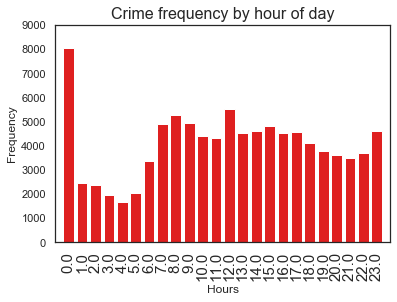

<Figure size 864x720 with 0 Axes>

In [71]:
# Using end time identify time of the day
end_hour = end_time.dt.hour
print(end_hour.value_counts())
ax = sns.barplot(x=end_hour.value_counts().index,y=end_hour.value_counts(), color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 9000))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')
plt.title("Crime frequency by hour of day",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

Highest crime recorded during midnight(why?), morning times (8-10am and at noon) see high crime occurence. 

### Crime month (End time)

8.0     9376
10.0    9153
7.0     9018
9.0     8962
11.0    8649
12.0    8639
1.0     8174
3.0     7983
2.0     7707
4.0     6659
5.0     6583
6.0     6417
Name: End_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

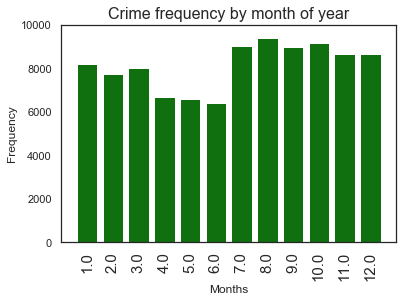

<Figure size 864x720 with 0 Axes>

In [72]:
# Using end time identify month of the year
end_month = end_time.dt.month
print(end_month.value_counts())
ax = sns.barplot(x=end_month.value_counts().index,y=end_month.value_counts(), color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 10000))
ax.set(xlim=(-1, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')
plt.title("Crime frequency by month of year",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

Lowest crime months are now seem to be April, May, June

### Crime day (Start time)

Friday       32268
Wednesday    30155
Thursday     30063
Tuesday      29766
Monday       27603
Saturday     27396
Sunday       24843
Name: Start_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

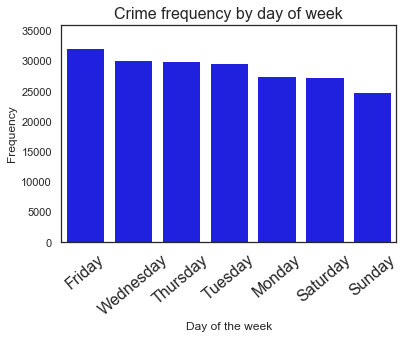

<Figure size 864x720 with 0 Axes>

In [73]:
# Using start time identify days of week
start_time = pd.to_datetime(mg_crimes["Start_Date_Time"])
start_week = start_time.dt.day_name()
print(start_week.value_counts())
ax = sns.barplot(x=start_week.value_counts().index,y=start_week.value_counts(),color='blue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylim=(0, 36000),xlabel='Day of the week',ylabel='Frequency')
ax.set(ylabel='Frequency')
ax.set(xlabel='Day of the week')
plt.title("Crime frequency by day of week",fontsize= 16)
plt.xticks(fontsize=16)
plt.figure(figsize=(12,10))

We still see that occurence of crimes during weekends is lower than the weekdays, and Friday is highest crime day. 

### Crime time (Start time)

0     13980
18    11907
17    11859
12    11831
20    11454
16    11446
22    11436
15    11398
21    11394
19    11353
23    10538
14     9431
13     9090
11     7936
10     7288
9      7194
1      6559
2      5761
8      5488
3      4067
7      3695
4      2538
6      2475
5      1976
Name: Start_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

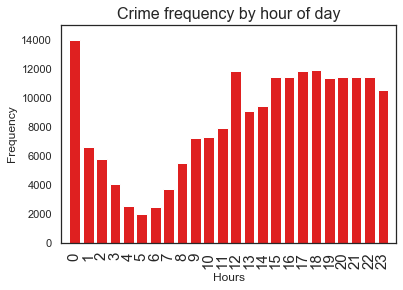

<Figure size 864x720 with 0 Axes>

In [74]:
# Using start time identify time of the day
start_hour = start_time.dt.hour
print(start_hour.value_counts())
ax = sns.barplot(x=start_hour.value_counts().index,y=start_hour.value_counts(), color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 15000))
ax.set(xlim=(-1, 24))
ax.set(ylabel='Frequency')
ax.set(xlabel='Hours')
plt.title("Crime frequency by hour of day",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

Highest crime recorded during midnight(why?), afternoon times see high crime occurence. 

### Crime month (Start time)

10    18758
7     18479
8     18408
9     18110
11    17778
12    17643
3     17284
1     17125
2     16465
4     14237
5     14161
6     13646
Name: Start_Date_Time, dtype: int64


<Figure size 864x720 with 0 Axes>

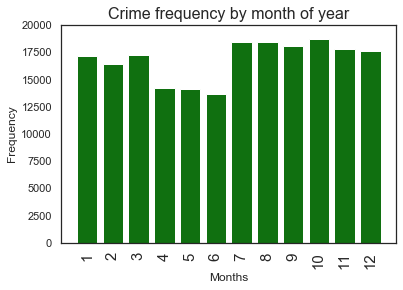

<Figure size 864x720 with 0 Axes>

In [75]:
# Using start time identify month of the year
start_month = start_time.dt.month
print(start_month.value_counts())
ax = sns.barplot(x=start_month.value_counts().index,y=start_month.value_counts(), color='green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 20000))
ax.set(xlim=(-1, 12))
ax.set(ylabel='Frequency')
ax.set(xlabel='Months')
plt.title("Crime frequency by month of year",fontsize= 16)
plt.xticks(fontsize=15)
plt.figure(figsize=(12,10))

Lowest crime months are now seem to be April, May, June

Comparing dispatcher, end, and start times:
We have obtained on cleaning data stage that we have zero missing entries for start_date_time column and it will be used as 'standard' data against which we contrast the results obtained from dispatch and end time calculations.

## Crime by year

Let us see if there is a trend on crime rate by year.  

2017    56202
2018    54164
2019    50973
2016    28208
2020    12547
Name: Start_Date_Time, dtype: int64


<Figure size 1440x720 with 0 Axes>

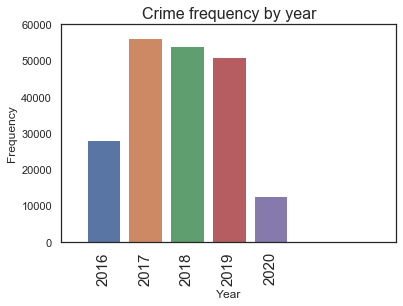

<Figure size 1440x720 with 0 Axes>

In [76]:
# Using start time identify crime by year
start_year = start_time.dt.year
print(start_year.value_counts())
ax = sns.barplot(x=start_year.value_counts().index,y=start_year.value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(ylim=(0, 60000))
ax.set(xlim=(-1, 7))
ax.set(ylabel='Frequency')
ax.set(xlabel='Year')
plt.title("Crime frequency by year",fontsize= 16)
plt.xticks(fontsize=15)
plt.savefig('crime_year.png')
plt.figure(figsize=(20,10))

We see here that the the crime count of year 2016 and 2020 are small, of course the year 2020 is still in progress so that is why crimes are low for this year. But the crime record of 2016 needs further investigation, but I suspect it is because of missing values.  

# Can we combine all info in one plot?

<Figure size 864x576 with 0 Axes>

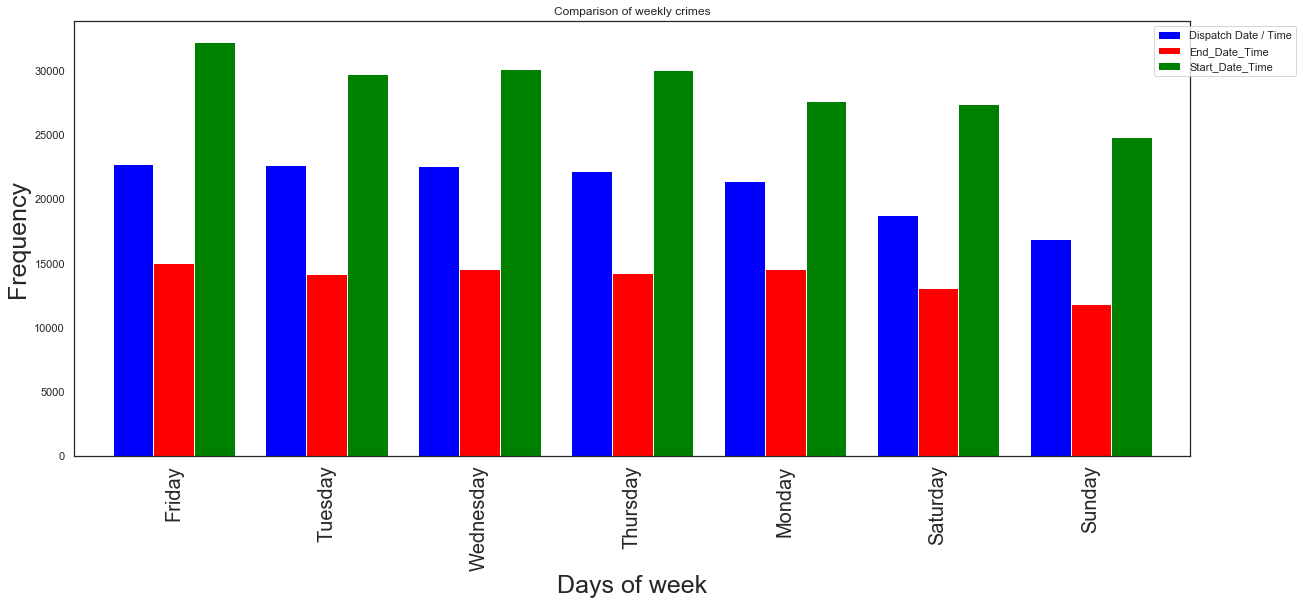

<Figure size 864x576 with 0 Axes>

In [77]:
df_proj1=dispatch_week.value_counts()
df_proj2=end_week.value_counts()
df_proj3=start_week.value_counts()
groups = [df_proj1,df_proj2,df_proj3]
group_labels = ['Dispatch', 'End time','Start time']
colors_list = ['blue', 'red', 'green']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [df_proj1, df_proj2, 
     df_proj3],
    axis=1).plot.bar(title='Comparison of weekly crimes',grid=False,width=0.8,figsize=(20, 8), color=colors_list).legend(bbox_to_anchor=(1.1, 1))
plt.ylabel('Frequency',fontsize=25)
plt.xlabel('Days of week',fontsize=25)
plt.xticks(fontsize=20)
plt.savefig('crime_day.png')
plt.figure(figsize=(12,8))

<Figure size 864x720 with 0 Axes>

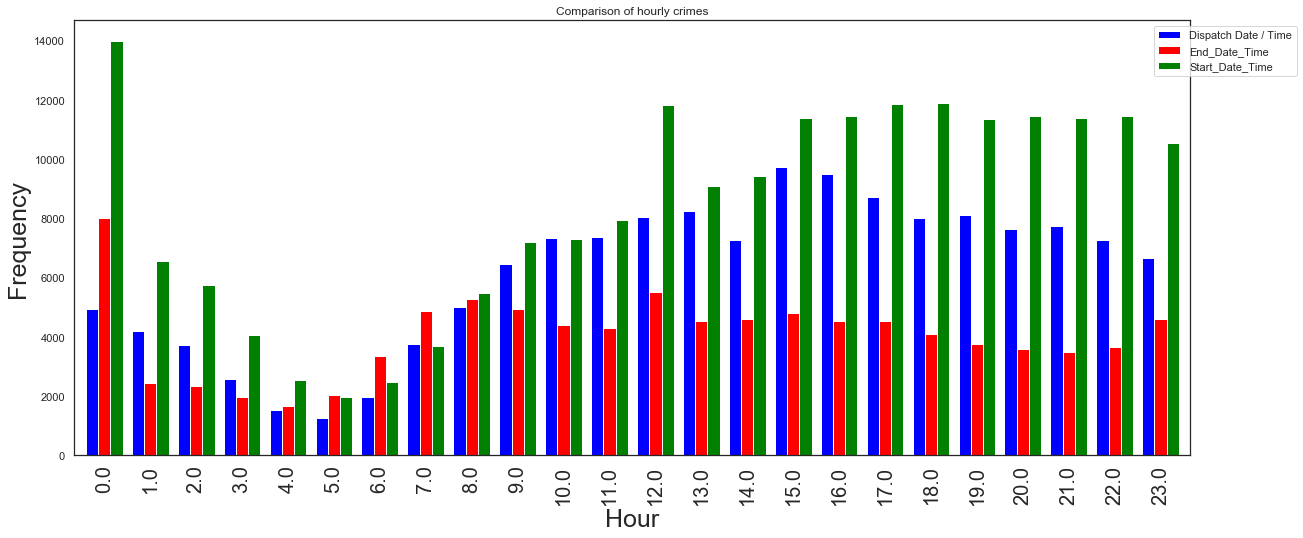

<Figure size 864x720 with 0 Axes>

In [78]:
df_proj1=dispatch_hour.value_counts()
df_proj2=end_hour.value_counts()
df_proj3=start_hour.value_counts()
groups = [df_proj1,df_proj2,df_proj3]
group_labels = ['Dispatch', 'End time','Start time']
colors_list = ['blue', 'red', 'green']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [df_proj1, df_proj2, 
     df_proj3],
    axis=1).plot.bar(title='Comparison of hourly crimes',grid=False,width=0.8,figsize=(20, 8), color=colors_list).legend(bbox_to_anchor=(1.1, 1))
plt.ylabel('Frequency',fontsize=25)
plt.xlabel('Hour',fontsize=25)
plt.xticks(fontsize=20)
plt.savefig('crime_hour.png', dpi=100)
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

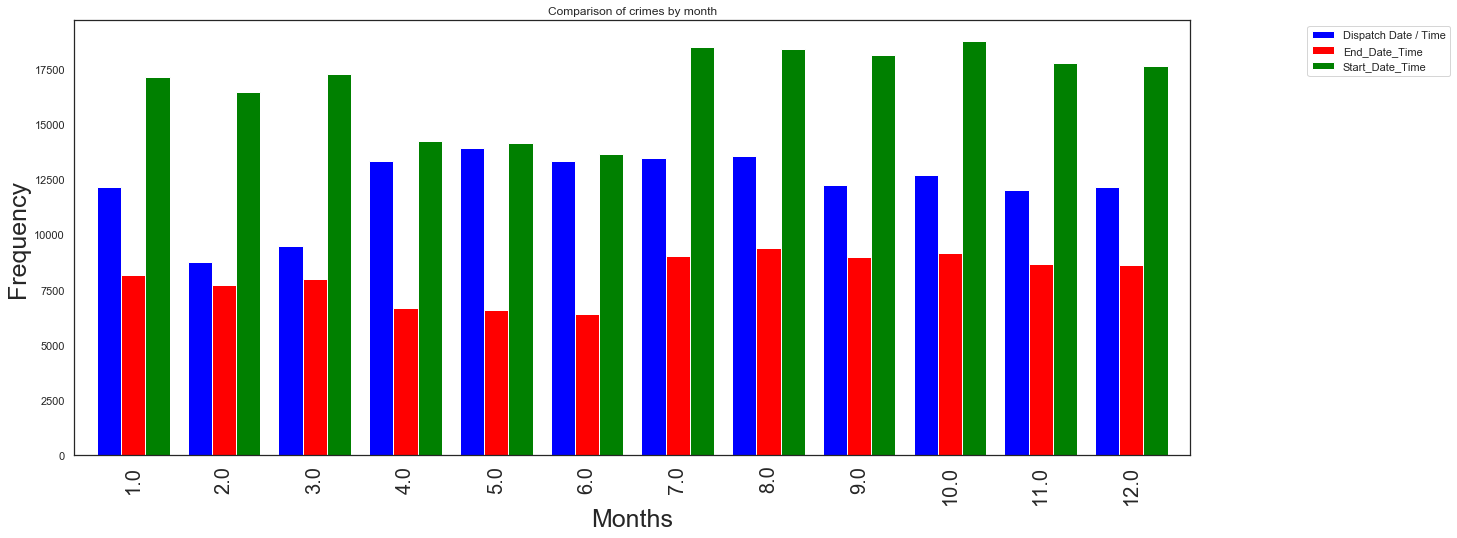

<Figure size 864x720 with 0 Axes>

In [79]:
df_proj1=dispatch_month.value_counts()
df_proj2=end_month.value_counts()
df_proj3=start_month.value_counts()
groups = [df_proj1,df_proj2,df_proj3]
group_labels = ['Dispatch', 'End time','Start time']
colors_list = ['blue', 'red', 'green']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(
    [df_proj1, df_proj2, 
     df_proj3],
    axis=1).plot.bar(title='Comparison of crimes by month',grid=False,width=0.8,figsize=(20, 8), color=colors_list).legend(bbox_to_anchor=(1.1, 1))
plt.ylabel('Frequency',fontsize=25)
plt.xlabel('Months',fontsize=25)
plt.xticks(fontsize=20)
plt.savefig('crime_month.png', dpi=100)
plt.figure(figsize=(12,10))

## b) Where do crimes happen?

The second question I would like to ask is where do crimes most likely be comitted?, is there a difference in number of crimes between cities? if so which cities are safe and which aren't? To answer these questions we need to seek information of location from the data set. In doing so we see that we have different columns that yields information about location, i.e Police District Name, Block Address, Zip Code, Sector, Beat, Latitude, Longitude, Police District Number, Location, Address Number.  
Based on the _isnull()_ assessment I made at the data cleaning stage, I chose the Police District Name column to do analysis, as this column has zero null entry.
We need to drop rows with null values and then hroup the crime occurence by Police District Name to areas with the highest crime frequencies. .

Police District Name
SILVER SPRING          43340
WHEATON                39583
MONTGOMERY VILLAGE     34193
ROCKVILLE              27536
BETHESDA               26810
GERMANTOWN             25679
CITY OF TAKOMA PARK     4904
OTHER                     36
TAKOMA PARK               13
Name: Police District Name, dtype: int64


<Figure size 864x720 with 0 Axes>

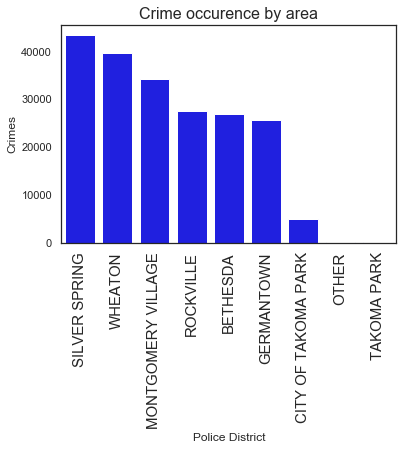

<Figure size 864x720 with 0 Axes>

In [80]:
# high crime area Police District Name
mg_crimes_filtered = mg_crimes.dropna(axis=0, subset=['Police District Name'])
mg_crimes_area = mg_crimes_filtered.groupby('Police District Name')['Police District Name'].count()
mg_crimes_sorted = mg_crimes_area.sort_values(ascending=False, inplace=False)
print(mg_crimes_sorted)
ax = sns.barplot(x=mg_crimes_sorted.index,y=mg_crimes_sorted, color="blue")
ax.set_ylabel('Crimes')
ax.set_xlabel('Police District')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Crime occurence by area",fontsize= 16)
plt.xticks(fontsize=15)
plt.savefig('crime_bydistrict.png', dpi=100)
plt.figure(figsize=(12,10))

We see that Silver Spring is where the highest crime occurence is registered, with in this area we can further refine to identify the cities associated with the highest crimes

## c) What type of crimes?

Information related to the types of crimes involved are provided in columns 'Crime Name1','Crime Name2','Crime Name3'. As these columns have same amount of missing data, i.e 71, there is no preference to chose one from the other based on null analysis. But looking at the description and a view on the columns I found the third column 'Crime Name3' to be somewhat broader and thus I use it to make my analysis. As a future endeveaor it will be good to make further analysis based on 'Crime Name1' and 'Crime Name2' and make a comparison.
The question I try to answer at this stage is: which types of crimes are commonly occuring? In order to identify the types of crimes I need to pivote table 'Crime Name3' and count the frequency of 'Incident ID'.

In [81]:
# Identifying the most recurring types of crimes
crime_types = mg_crimes.pivot_table(index='Crime Name3',values=['Incident ID'],aggfunc='count')
crime_types.rename(columns={'Incident ID':'Frequency'}, inplace=True)
crime_types.reset_index(inplace=True)
sorted_crime_types_top= crime_types.sort_values(by='Frequency', ascending=False).head()
sorted_crime_types_bottom= crime_types.sort_values(by='Frequency', ascending=True).head()

In [82]:
print(f"Top five types of crimes")
sorted_crime_types_top


Top five types of crimes


,Crime Name3,Frequency
187,LARCENY - FROM AUTO,16811
90,DRUGS - MARIJUANA - POSSESS,13983
239,POLICE INFORMATION,11194
68,DRIVING UNDER THE INFLUENCE LIQUOR,10878
11,ASSAULT - 2ND DEGREE,10858


In [83]:
print(f"Least five types of crimes ")
sorted_crime_types_bottom

Least five types of crimes 


,Crime Name3,Frequency
161,HOMICIDE - NEGLIGENT MANSLAUGHTER,1
52,COMPOUNDING CRIME,1
53,CONDIT RELEASE VIOLATION,1
54,CONSERVATION - ANIMALS (DESCRIBE OFFENSE),1
62,DAMAGE PROPERTY - BUSINESS-WITH EXPLOSIVE,1


### Relation between crime types and district and area?

In [84]:
crimes_district = mg_crimes.pivot_table(index=['Police District Name', 'Crime Name3'], values=['Incident ID'], aggfunc='count')
crimes_district.rename(columns={'Incident ID':'Count'}, inplace=True) # Renaming column
crimes_district.reset_index(inplace=True) # Removing indexes

idx = crimes_district.groupby(['Police District Name'])['Count'].transform(max) == crimes_district['Count']
crimes_district[idx]

,Police District Name,Crime Name3,Count
129,BETHESDA,LARCENY - FROM AUTO,3046
330,CITY OF TAKOMA PARK,LARCENY - FROM AUTO,615
556,GERMANTOWN,LARCENY - SHOPLIFTING,2163
797,MONTGOMERY VILLAGE,LARCENY - FROM AUTO,2470
930,OTHER,POLICE INFORMATION,8
1111,ROCKVILLE,POLICE INFORMATION,2541
1330,SILVER SPRING,LARCENY - FROM AUTO,4259
1449,TAKOMA PARK,DRUGS - MARIJUANA - POSSESS,5
1522,WHEATON,DRUGS - MARIJUANA - POSSESS,3503


In [85]:
# Ordering top to bottom
crimes_district.sort_values(by=['Count'], ascending=False)[idx]

/Users/ramlijufar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Police District Name,Crime Name3,Count
1330,SILVER SPRING,LARCENY - FROM AUTO,4259
1522,WHEATON,DRUGS - MARIJUANA - POSSESS,3503
129,BETHESDA,LARCENY - FROM AUTO,3046
1111,ROCKVILLE,POLICE INFORMATION,2541
797,MONTGOMERY VILLAGE,LARCENY - FROM AUTO,2470
556,GERMANTOWN,LARCENY - SHOPLIFTING,2163
330,CITY OF TAKOMA PARK,LARCENY - FROM AUTO,615
930,OTHER,POLICE INFORMATION,8
1449,TAKOMA PARK,DRUGS - MARIJUANA - POSSESS,5


### Which of places/areas (street,parking, mall etc?) do we frequently see crimes

In [86]:
crimes_place = mg_crimes.pivot_table(index=['Place'], values=['Incident ID'], aggfunc='count')
crimes_place.rename(columns={'Incident ID':'Count'}, inplace=True) 
crimes_place.reset_index(inplace=True) 

top_places = crimes_place[crimes_place['Count']>1000].sort_values(by=['Count'], ascending=False)
top_places

,Place,Count
78,Street - In vehicle,26793
57,Residence - Single Family,20919
48,Residence - Apartment/Condo,17610
27,Other/Unknown,13676
80,Street - Residential,13001
41,Parking Lot - Residential,9327
59,Residence -Townhouse/Duplex,9119
35,Parking Lot - Commercial,7367
51,Residence - Driveway,6995
74,School/College,5912


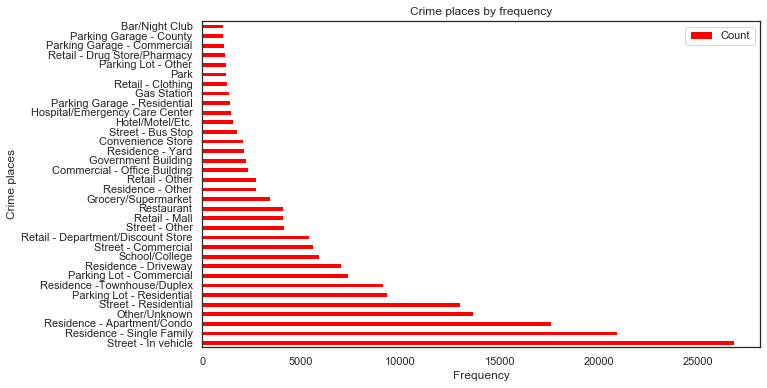

In [87]:

ax = top_places.plot.barh (x='Place',y='Count',figsize=(10, 6), color='red')
plt.xlabel('Frequency') # add to x-label to the plot
plt.ylabel('Crime places') # add y-label to the plot
plt.title('Crime places by frequency') # add title to the plot
plt.savefig('crime_types.png', dpi=100)


# Conclusions

* For dispatch time analysis, three factors were used: hour, day of the week and month. According to the hours chart, most crimes occur during the morning (7am to 12pm). The beginning of the week was also the period most frequently (Monday, Tuesday and Wednesday). The analysis of the months shows that February and March, have lesser crime incidents.
* Most of the crimes committed are indicated to be committed in and around Silver Spring district.
* We also observed that the most crimes occur around residential places, and least crimes are commited in places like Bar/Club.
* The most common crime is Larceny followed by drugs/marijuana possession.
* The least crimes are crimes such as: homicide, damage property, etc.

# Further exploration needed on...

From the data it is still possible to dig deep and explore more parameters of which I cite the following ideas :

* Is it possible to determine the longest and shortest police response time? Does the response time vary from district to district?
* It will be insightful and helpful to classify the types of crimes by whether they are violent or not.
* Furthermore, a relevant information could be to know in which places there are more occurrences of crimes and in which shift these crimes are most common.
* Further analysis based on year is needed to answer the low crime level of year 2016.
* Will we arrive at different conclusion if we make analysis based on population density instead of district?

This notebook was created by [Dawit H. Hailu](https://www.linkedin.com/in/dawit-h-hailu-ph-d-4b7b8787/)